## Explanation of Entropy and Jensen-Shannon Divergence with a binary PDF

In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
from scipy.special import xlogy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

texfig = r'''
\centering
\includegraphics[width={WSCALE}\textwidth]{{{FPATH}}}
\caption{{{CAPTION}}}
\label{{fig:{LABEL}}}
'''

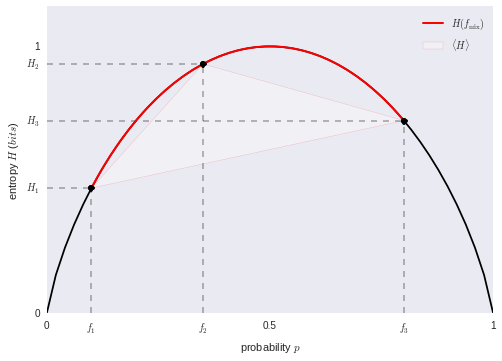

In [18]:
fig_label = 'jsd_entropy'
fig_format = '.eps'
fig_wscale = 1
fig_caption = r'''
    Jensen-Shannon Divergence as mixing entropy.
    The graph shows the entropy $H$ of a discrete binary probability distribution function (PDF) $f(\{x_1, x_2\})$ as a function of the probability $p=f(x_1)=1-f(x_2)$.
    The black points show the location of three example PDFs, $f_1$, $f_2$ and $f_3$, in this space.
    Features highlighted in red are quantities entering the Jensen-Shannon Divergence (JSD).
    The entropy of the mixture $H(f_\text{mix})$ can lie anywhere on the red segment of the curve.
    The average entropy, $\langle H \rangle$, is restricted to the area designated by the triangle.
    '''

output = '../fig/' + fig_label + fig_format

def entropy(prob):
    euler = np.exp(1)
    q = 1 - prob
    entropy_bits = np.log2(euler)*(-xlogy(prob, prob) - xlogy(q, q))
    return entropy_bits

points = np.asarray([.1, .35, .8])
weights = np.ones_like(points)*1/3
fmix = np.dot(points, weights)
hmix = np.dot(entropy(points), weights)

domain = np.linspace(0, 1)
hmix_domain = np.linspace(points[0], points[-1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(domain, entropy(domain), 'k')
ax.plot(hmix_domain, entropy(hmix_domain), 'r-', linewidth=2, label=r'$H(f_\mathrm{mix})$')
ax.fill(points, entropy(points), 'wo-', edgecolor='r', alpha=0.3, label=r'$\langle H \rangle$')
ax.hlines(entropy(points), 0, points, linestyles=u'dashed', alpha=0.3)
ax.vlines(points, 0, entropy(points), linestyles=u'dashed', alpha=0.3)
#ax.vlines(fmix, 0, entropy(fmix), 'k', linestyles=u'dashed', alpha=0.3)
ax.plot(points, entropy(points), 'ko')
#ax.plot(fmix, hmix, 'ro')
#ax.plot(fmix, entropy(fmix), 'ro')
#ax.arrow(fmix, hmix, 0, entropy(fmix)-hmix, fc='k', length_includes_head=True)
#ax.text(0.05, 0.45*(hmix+entropy(fmix)), r'$J$', fontsize=14, color='r')
ax.set_xticks(np.hstack((points, [0, 0.5, 1, fmix])))
ax.set_xticklabels([r'$f_%i$' % i for i in range(1,4)] + [0, 0.5, 1])# + [r'$f_\mathrm{mix}$'])
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel(r'probability $p$')
ax.set_ylim(0, 1.15)
ax.set_yticks(np.hstack((entropy(points), [0, 1])))
ax.set_yticklabels([r'$H_%i$' % i for i in range(1,4)] + [0, 1])
ax.yaxis.set_ticks_position('left')
ax.set_ylabel(r'entropy $H$ ($bits$)')
ax.legend()
ax.grid(b=False)
### OUTPUT

fig.savefig(output)

with open(output.replace(fig_format, '.tex'), 'w') as tex:
    print(texfig.format(WSCALE=fig_wscale, FPATH=fig_label+fig_format, LABEL=fig_label, CAPTION=fig_caption),
          file=tex)

In [9]:
from pandas import DataFrame, Series
import pandas as pd
import seaborn as sns

data = "../../../data/code/nucleotide_diversity/div.txt"
df = pd.read_table(data, header=None)

# Load one of the data sets that come with seaborn
tips = sns.load_dataset("tips")

In [17]:
s = df.icol(-1).value_counts()
ecdf = s.sort_index().cumsum()*1./len(s)

In [55]:
import matplotlib.pyplot as plt
ecdf = s.sort_index().cumsum()*1./sum(s)

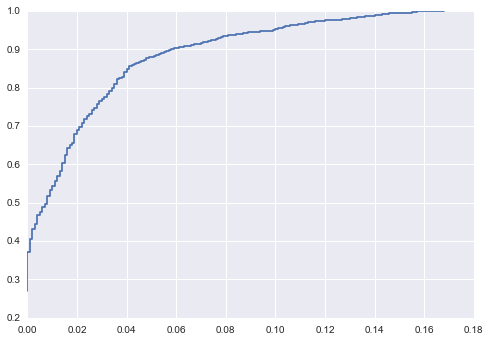

In [59]:
plt.step(ecdf.index, ecdf)

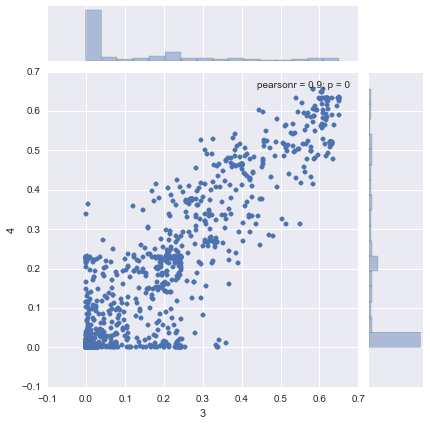

In [46]:
sns.jointplot(df.icol(3), df.icol(4))

In [61]:
!ls

diversity_analysis.ipynb  figures.ipynb  methylome.ipynb


In [62]:
!pwd

/home/oender/logos1917@gmail.com/project_PopulationEpigenetics/project/papers/1_methylome_diversity/code
